In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from pathlib import Path
import os

In [18]:
# Paths to timings data
current_dir = os.getcwd()
#fenics_timings = "/home/cecile/dev/fenics-networks/applications/fenics/plots_perf/timings_lm_spaces.txt"
#fenicsx_timings = "/home/cecile/dev/networks_fenicsx/demos/demo_perf_lm_spaces_docker2/timings_lm_spaces.txt"

# FEniCS(x) without using cache (i.e. cache cleaned)
fenics_cache0 = "/home/cecile/dev/fenics-networks/applications/fenics/plots_perf_cache0/timings_lm_spaces.txt"
fenicsx_cache0 = "/home/cecile/dev/networks_fenicsx/demos/demo_perf_lm_spaces_cache0/timings_lm_spaces.txt"
# FEniCS(x) using cache
fenics_cache1 = "/home/cecile/dev/fenics-networks/applications/fenics/plots_perf_cache1/timings_lm_spaces.txt"
fenicsx_cache1 = "/home/cecile/dev/networks_fenicsx/demos/demo_perf_lm_spaces_cache1/timings_lm_spaces.txt"

In [19]:
# Translate timings table into dictionnaries
# Without cache
df_fenics_cache0 = pd.read_csv(fenics_cache0, sep = "\t", index_col=0, header=0)
df_fenicsx_cache0 = pd.read_csv(fenicsx_cache0, sep = "\t", index_col=0)
# With cache
df_fenics_cache1 = pd.read_csv(fenics_cache1, sep = "\t", index_col=0, header=0)
df_fenicsx_cache1 = pd.read_csv(fenicsx_cache1, sep = "\t", index_col=0)
# Dictionnaries
fenics_cache0_dict = df_fenics_cache0.to_dict()
fenicsx_cache0_dict = df_fenicsx_cache0.to_dict()
fenics_cache1_dict = df_fenics_cache1.to_dict()
fenicsx_cache1_dict = df_fenicsx_cache1.to_dict()

In [20]:
def n_dict(d: dict):
    new_dict = dict()
    for i,n in enumerate(list(d["forms"].keys())):
        new_dict[n] = dict()
        for key in list(d.keys()):
            new_dict[n][key] = list(d[key].values())[i]
    return new_dict

In [21]:
# Transform initial dictionnary into {n: {forms: x, assembly: x, solve: x}, ... }
fenics_cache0_n_dict = n_dict(fenics_cache0_dict)
fenicsx_cache0_n_dict = n_dict(fenicsx_cache0_dict)
fenics_cache1_n_dict = n_dict(fenics_cache1_dict)
fenicsx_cache1_n_dict = n_dict(fenicsx_cache1_dict)

In [33]:
# Set graph colors
colors=["moccasin", "chocolate"]
# Set plots parameters
plt.rcParams.update({'font.size': 18})

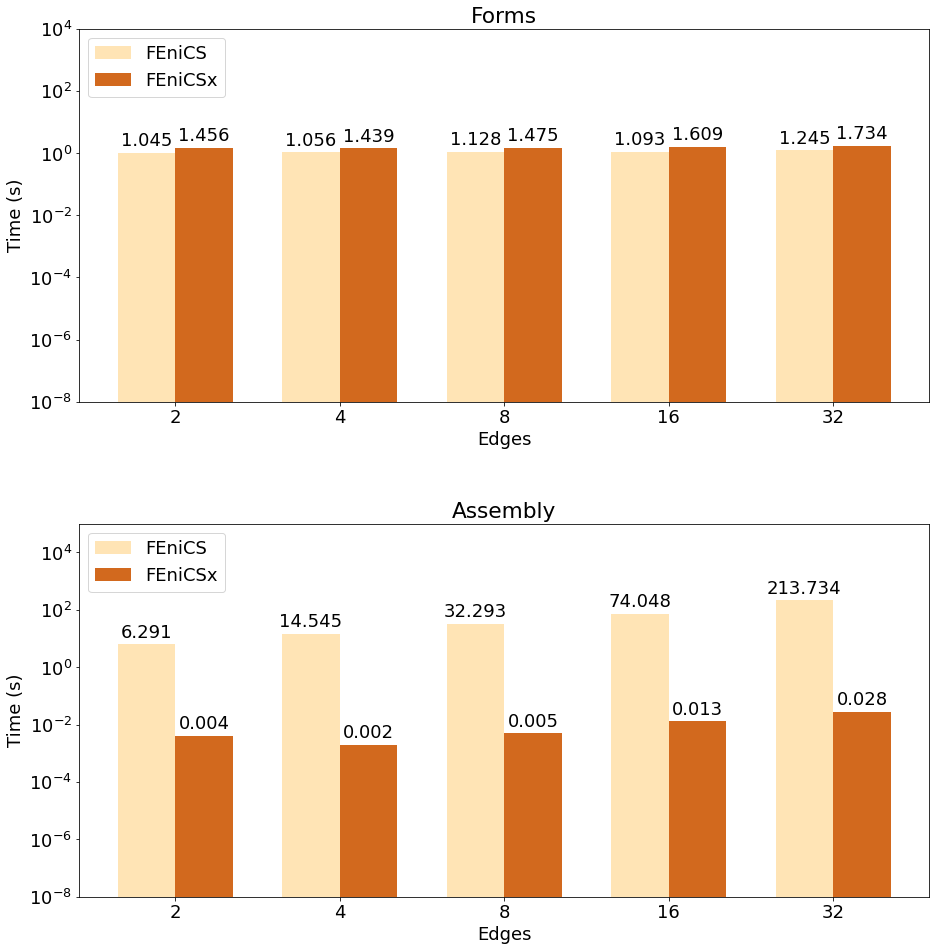

In [36]:
# Bar plots - one plot per task (forms - assembly - solve)
#fig, (ax_forms, ax_assembly, ax_solve) = plt.subplots(1, 3)
fig, (ax_forms, ax_assembly) = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout(pad=5.0)

ns = list(fenics_cache0_n_dict.keys())
nb_edges = [int(pow(2,key-1)) for key in ns]

x = np.arange(len(ns))  # the label locations
width = 0.35  # the width of the bars

### ----------- Forms ----------- ###
ax_forms.set_yscale('log')
fenics_cache0_forms = fenics_cache0_dict["forms"]
fenicsx_cache0_forms = fenicsx_cache0_dict["forms"]

forms_cache0_dict = {'FEniCS': fenics_cache0_forms.values(), 'FEniCSx': fenicsx_cache0_forms.values()}

multiplier = 0
for attribute, measurement in forms_cache0_dict.items():
    offset = width * multiplier
    rects = ax_forms.bar(x + offset, measurement, width, color=colors[multiplier], label=attribute)
    ax_forms.bar_label(rects, padding=3)
    multiplier += 1

ax_forms.set_ylabel('Time (s)')
ax_forms.set_xlabel('Edges')
ax_forms.set_title('Forms')
ax_forms.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
ax_forms.legend(loc='upper left')
ax_forms.set_ylim(1e-8, 10**4)
### -------------------------------- ###

### ----------- Assembly ----------- ###
ax_assembly.set_yscale('log')
fenics_cache0_assembly = fenics_cache0_dict["assembly"]
fenicsx_cache0_assembly = fenicsx_cache0_dict["assembly"]

assembly_cache0_dict = {'FEniCS': fenics_cache0_assembly.values(), 'FEniCSx': fenicsx_cache0_assembly.values()}

multiplier = 0
for attribute, measurement in assembly_cache0_dict.items():
    offset = width * multiplier
    rects = ax_assembly.bar(x + offset, measurement, width, color=colors[multiplier], label=attribute)
    ax_assembly.bar_label(rects, padding=3)
    multiplier += 1
    
ax_assembly.set_ylabel('Time (s)')
ax_assembly.set_xlabel('Edges')
ax_assembly.set_title('Assembly')
ax_assembly.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
ax_assembly.legend(loc='upper left')
ax_assembly.set_ylim(1e-8, 10**5)
### -------------------------------- ###

### ----------- Solve ----------- ###
# fenics_solve = fenics_dict["solve"]
# fenicsx_solve = fenicsx_dict["solve"]
# solve_dict = {'FEniCS': fenics_solve.values(), 'FEniCSx': fenicsx_solve.values()}

#multiplier = 0
# for attribute, measurement in solve_dict.items():
#     offset = width * multiplier
#     rects = ax_solve.bar(x + offset, measurement, width, label=attribute)
#     ax_solve.bar_label(rects, padding=3)
#     multiplier += 1
    
# ax_solve.set_ylabel('Time (s)')
# ax_solve.set_xlabel('Edges')
# ax_solve.set_title('Solve')
# ax_solve.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
# ax_solve.legend(loc='upper left')
# ax_solve.set_ylim(0, 0.015)
### -------------------------------- ###

Path(current_dir + "/../demos/plots_lm_spaces").mkdir(exist_ok=True)
timestr = time.strftime("%d%m%Y-%H%M%S")
plt.savefig(current_dir + "/../demos/plots_lm_spaces/time_cache0_" + timestr + ".png",
                           facecolor='white',
                           dpi=300,
                           format="png")


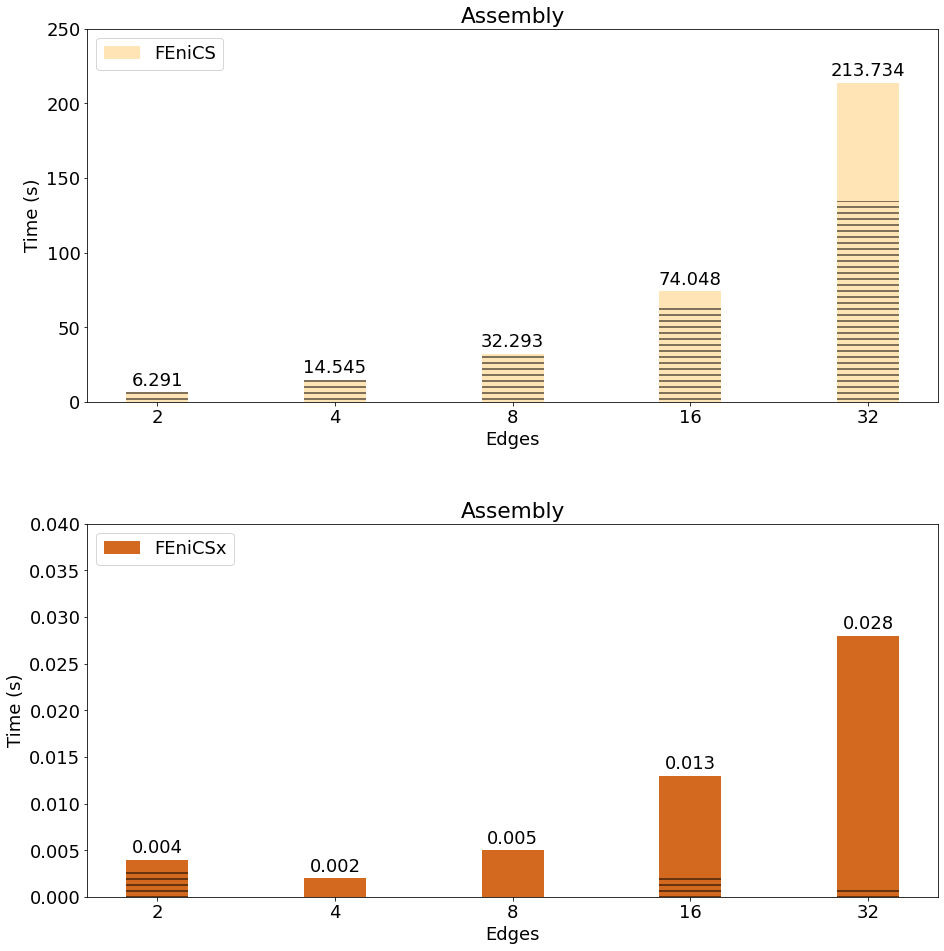

In [37]:
# Bar plots - one plot per task (forms - assembly - solve)
#fig, (ax_forms, ax_assembly, ax_solve) = plt.subplots(1, 3)
fig, (ax_fenics_assembly, ax_fenicsx_assembly) = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout(pad=5.0)

ns = list(fenics_cache0_n_dict.keys())
nb_edges = [int(pow(2,key-1)) for key in ns]

x = np.arange(len(ns))  # the label locations
width = 0.35  # the width of the bars

### ----------- Assembly ----------- ###
ax_assembly.set_yscale('log')
fenics_cache0_assembly = fenics_cache0_dict["assembly"]
fenicsx_cache0_assembly = fenicsx_cache0_dict["assembly"]
fenics_cache1_assembly = fenics_cache1_dict["assembly"]
fenicsx_cache1_assembly = fenicsx_cache1_dict["assembly"]

fenics_diff_assembly = {ns[i]:(list(fenics_cache0_assembly.values())[i] - list(fenics_cache1_assembly.values())[i]) 
                     for i in range(len(ns))}
fenicsx_diff_assembly = {ns[i]:(list(fenicsx_cache0_assembly.values())[i] - list(fenicsx_cache1_assembly.values())[i]) 
                     for i in range(len(ns))}

assembly_fenics_cache0_dict = {'FEniCS': fenics_cache0_assembly.values()}
assembly_fenics_diff_dict = {'FEniCS': fenics_diff_assembly.values()}

multiplier = 0
for attribute, measurement in assembly_fenics_cache0_dict.items():
    offset = width * multiplier
    rects = ax_fenics_assembly.bar(x + offset, measurement, width, color=colors[0], label=attribute)
    ax_fenics_assembly.bar_label(rects, padding=3)
    multiplier += 1
    
multiplier = 0
for attribute, measurement in assembly_fenics_diff_dict.items():
    offset = width * multiplier
    rects = ax_fenics_assembly.bar(x + offset, measurement, width, color="none", hatch='--')
    multiplier += 1

ax_fenics_assembly.set_ylabel('Time (s)')
ax_fenics_assembly.set_xlabel('Edges')
ax_fenics_assembly.set_title('Assembly')
ax_fenics_assembly.set_xticks(x, labels=[str(n) for n in nb_edges])
ax_fenics_assembly.legend(loc='upper left')
ax_fenics_assembly.set_ylim(0, 250)
    
assembly_fenicsx_cache0_dict = {'FEniCSx': fenicsx_cache0_assembly.values()}
assembly_fenicsx_diff_dict = {'FEniCSx': fenicsx_diff_assembly.values()}

multiplier = 0
for attribute, measurement in assembly_fenicsx_cache0_dict.items():
    offset = width * multiplier
    rects = ax_fenicsx_assembly.bar(x + offset, measurement, width, color=colors[1], label=attribute)
    ax_fenicsx_assembly.bar_label(rects, padding=3)
    multiplier += 1
    
multiplier = 0
for attribute, measurement in assembly_fenicsx_diff_dict.items():
    offset = width * multiplier
    rects = ax_fenicsx_assembly.bar(x + offset, measurement, width, color="none", hatch='--')
    multiplier += 1
    
ax_fenicsx_assembly.set_ylabel('Time (s)')
ax_fenicsx_assembly.set_xlabel('Edges')
ax_fenicsx_assembly.set_title('Assembly')
ax_fenicsx_assembly.set_xticks(x, labels=[str(n) for n in nb_edges])
ax_fenicsx_assembly.legend(loc='upper left')
ax_fenicsx_assembly.set_ylim(0,0.04)
### -------------------------------- ###

Path(current_dir + "/../demos/plots_lm_spaces").mkdir(exist_ok=True)
timestr = time.strftime("%d%m%Y-%H%M%S")
plt.savefig(current_dir + "/../demos/plots_lm_spaces/time_assembly_diff_" + timestr + ".png",
                           facecolor='white',
                           dpi=300,
                           format="png")

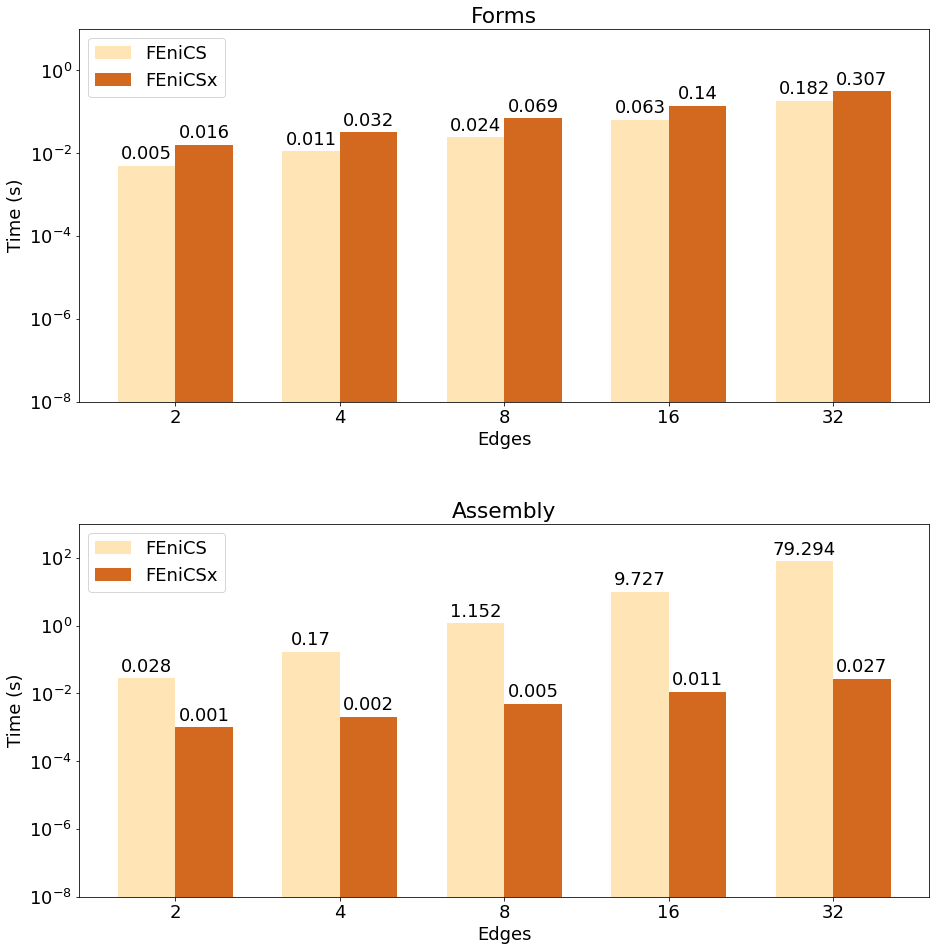

In [38]:
# Bar plots - without cleaning the cache (i.e. without recompiling the forms)
fig, (ax_forms, ax_assembly) = plt.subplots(2, 1)
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout(pad=5.0)

ns = list(fenics_cache0_n_dict.keys())
nb_edges = [int(pow(2,key-1)) for key in ns]

x = np.arange(len(ns))  # the label locations
width = 0.35  # the width of the bars

### ----------- Forms ----------- ###
ax_forms.set_yscale('log')
fenics_cache1_forms = fenics_cache1_dict["forms"]
fenicsx_cache1_forms = fenicsx_cache1_dict["forms"]

forms_cache1_dict = {'FEniCS': fenics_cache1_forms.values(), 'FEniCSx': fenicsx_cache1_forms.values()}

multiplier = 0
for attribute, measurement in forms_cache1_dict.items():
    offset = width * multiplier
    rects = ax_forms.bar(x + offset, measurement, width, color=colors[multiplier], label=attribute)
    ax_forms.bar_label(rects, padding=3)
    multiplier += 1

ax_forms.set_ylabel('Time (s)')
ax_forms.set_xlabel('Edges')
ax_forms.set_title('Forms')
ax_forms.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
ax_forms.legend(loc='upper left')
ax_forms.set_ylim(1e-8, 10)
### -------------------------------- ###

### ----------- Assembly ----------- ###
ax_assembly.set_yscale('log')
fenics_cache1_assembly = fenics_cache1_dict["assembly"]
fenicsx_cache1_assembly = fenicsx_cache1_dict["assembly"]

assembly_cache1_dict = {'FEniCS': fenics_cache1_assembly.values(), 'FEniCSx': fenicsx_cache1_assembly.values()}

multiplier = 0
for attribute, measurement in assembly_cache1_dict.items():
    offset = width * multiplier
    rects = ax_assembly.bar(x + offset, measurement, width, color=colors[multiplier], label=attribute)
    ax_assembly.bar_label(rects, padding=3)
    multiplier += 1
    
ax_assembly.set_ylabel('Time (s)')
ax_assembly.set_xlabel('Edges')
ax_assembly.set_title('Assembly')
ax_assembly.set_xticks(x + width/2, labels=[str(n) for n in nb_edges])
ax_assembly.legend(loc='upper left')
ax_assembly.set_ylim(1e-8, 10**3)
### -------------------------------- ###

Path(current_dir + "/../demos/plots_lm_spaces").mkdir(exist_ok=True)
timestr = time.strftime("%d%m%Y-%H%M%S")
plt.savefig(current_dir + "/../demos/plots_lm_spaces/time_forms_cache1_" + timestr + ".png",
                           facecolor='white',
                           dpi=300,
                           format="png")
